In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# Function to simulate bandits and return rewards
def simulate_bandits(K, N):
    bandits = [np.random.normal(loc=np.random.randint(1, 10), scale=np.random.uniform(1.0, 5.0), size=N) for _ in range(K)]
    return bandits

In [69]:
# Function to perform the K-armed bandit simulation for different scenarios
def k_armed_bandit_simulation(N, K, scenario):
    bandits = simulate_bandits(K, N)
    total_reward = 0
    rewards = np.zeros(N)
    chosen_levers = np.zeros(N)

    epsilon = 0.1
    exploration_decay = 0.99

    for t in range(N):
        if scenario == 'random':
            lever = np.random.randint(0, K)
        elif scenario == 'exploitation':
            if t == 0:
                lever = np.random.randint(0, K)
            else:
                lever = np.argmax(rewards[:t])
        elif scenario == 'epsilon_greedy':
            if np.random.rand() < epsilon:
                lever = np.random.randint(0, K)
            else:
                if t == 0:
                    lever = np.random.randint(0, K)
                else:
                    lever = np.argmax(rewards[:t])
        elif scenario == 'epsilon_decay':
            if np.random.rand() < epsilon:
                lever = np.random.randint(0, K)
            else:
                if t == 0:
                    lever = np.random.randint(0, K)
                else:
                    lever = np.argmax(rewards[:t])
            epsilon *= exploration_decay

        lever = min(lever, K - 1)
        reward = bandits[lever][t]
        total_reward += reward
        rewards[t] = total_reward / (t + 1)
        chosen_levers[t] = lever
    print("Bandits: ", bandits)
    return rewards


In [70]:
def plot_results(N, all_rewards):
    for scenario, rewards in all_rewards.items():
        plt.plot(range(1, N + 1), rewards, label=scenario)
    plt.xlabel('Iterations (t)')
    plt.ylabel('Average Reward')
    plt.title('Exploration vs. Exploitation Dilemma')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


Bandits:  [array([ 4.30030474e+00,  2.43190994e+00,  4.00539008e+00,  1.65211381e+00,
        6.07746815e+00,  8.19078539e+00,  2.80310698e+00, -2.39992832e+00,
        4.83534357e+00,  1.36623691e+00,  7.18361573e+00,  1.75712007e+00,
        7.77842716e+00,  5.82320219e-01,  4.97872354e+00,  1.85900557e+00,
        1.47903909e+00,  7.27780056e+00,  6.60295514e+00,  6.60354870e+00,
        3.72069230e+00, -1.03767040e+00,  2.63976837e+00,  5.31651205e+00,
        3.43170228e+00,  1.73096633e+00,  6.21389303e+00,  6.05068856e-01,
        4.21325031e+00,  4.31668074e+00,  7.92879502e+00,  6.26326156e+00,
        3.94760437e+00,  2.86466791e+00,  2.35547185e+00,  2.48504995e+00,
        1.15897822e+00,  6.02528825e+00,  4.21429016e+00,  2.99786503e+00,
        2.33857515e+00,  2.79668819e+00,  4.70676732e+00,  3.93066893e+00,
        4.45565660e+00,  5.48152088e+00,  2.82353446e+00,  1.15620306e+00,
        5.57722435e+00,  4.70666814e+00,  9.01435263e+00,  5.65368644e+00,
        2.2597

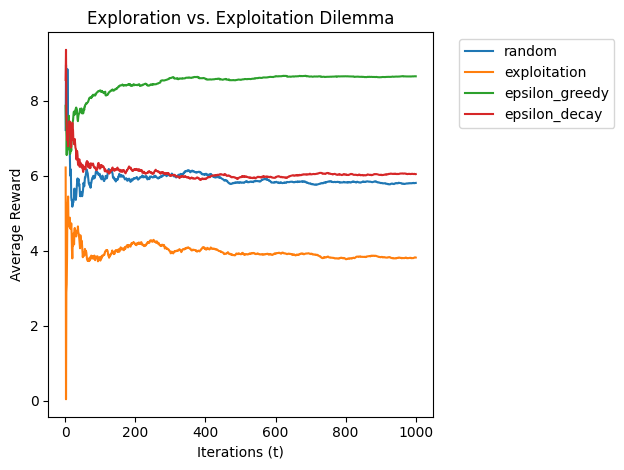

{'random': array([7.21461199, 8.95084426, 8.33438001, 8.66370205, 7.36452646,
       8.83667866, 7.97473985, 6.84522189, 6.87350529, 7.09481251,
       6.96653036, 6.89834906, 6.56418899, 5.99946515, 6.17112307,
       6.00603627, 5.42875718, 5.33461744, 5.3375115 , 5.1710484 ,
       5.23138107, 5.27264918, 5.28677789, 5.35827464, 5.431421  ,
       5.65260967, 5.44383593, 5.42883518, 5.38691846, 5.35124387,
       5.43439068, 5.5731518 , 5.72240029, 5.87669674, 5.92421916,
       5.83455819, 5.86257316, 5.90477247, 5.73664988, 5.77464482,
       5.65118965, 5.4538848 , 5.47548323, 5.45047082, 5.46243778,
       5.53997942, 5.56749927, 5.45021013, 5.51238002, 5.56572579,
       5.66798137, 5.80597392, 5.75209862, 5.71463301, 5.81173649,
       5.94886991, 5.94188571, 5.98742144, 6.06140655, 6.12729453,
       6.16110793, 6.11912426, 6.08765539, 6.05775692, 5.96433909,
       5.88850528, 5.7926367 , 5.7805899 , 5.7443307 , 5.75218842,
       5.80014642, 5.67608433, 5.77109427, 5.798059

In [71]:
N = 1000
K = 10
scenarios = ['random', 'exploitation', 'epsilon_greedy', 'epsilon_decay']
all_rewards = {}
for scenario in scenarios:
    rewards = k_armed_bandit_simulation(N, K, scenario)
    all_rewards[scenario] = rewards


plot_results(N, all_rewards)
print(all_rewards)
